In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
supply_data = pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')
# # Step 1: Prepare the data
# # Convert Date column to datetime and sort
supply_data ['Date'] = pd.to_datetime(supply_data['Date'])
supply_data = supply_data.sort_values('Date')
supply_data['Supply'] = supply_data['Supply'].str.replace(',', '').astype(float)

# # Add lagged features
# data['Supply_lag1'] = data['Supply'].shift(1)
# data['Supply_lag7'] = data['Supply'].shift(7)
# data['Supply_lag14'] = data['Supply'].shift(14)

# # Add moving average features
# data['Supply_MA7'] = data['Supply'].rolling(window=7).mean()
# data.dropna(inplace=True)

# # Create target and feature variables
# target = 'Supply'
# features = ['72 Day Temperature', '72 Day Precipitation', 'Harvest Volume (tons/day)', 'Supply_lag1', 'Supply_lag7', 'Supply_lag14', 'Supply_MA7']
# y = data[target]
# X = data[features]
# Prepare the data for SARIMA
# supply_data['Year'] = supply_data.index.year
# Prepare the data for LightGBM
supply_data = supply_data.reset_index()  # Reset index for model compatibility
supply_data['Date'] = supply_data['Date'].map(pd.Timestamp.toordinal)  # Convert dates to ordinal values

# Features and target
X = supply_data[['Date', '72 Day Temperature', '72 Day Precipitation']]
y = supply_data['Supply']

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 3
[LightGBM] [Info] Start training from score 40139919.642373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

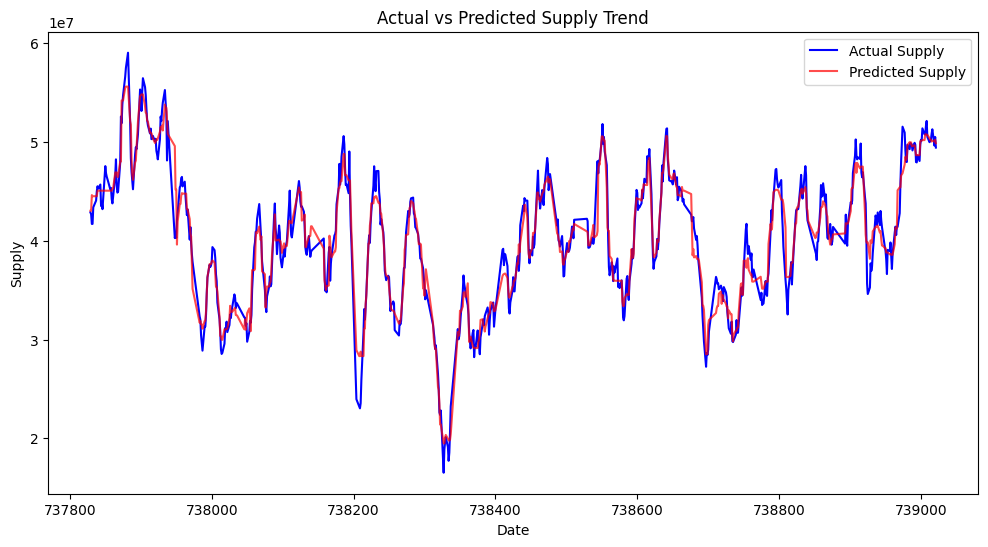

np.float64(2158072.0991902384)

In [27]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)

# Predictions
y_pred = lgbm.predict(X_test)
y_pred_full = lgbm.predict(X)

# Calculate RMSE for evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Trend Comparison Plot
plt.figure(figsize=(12, 6))
plt.plot(supply_data['Date'], y, label='Actual Supply', color='blue')
plt.plot(supply_data['Date'], y_pred_full, label='Predicted Supply', color='red', alpha=0.7)
plt.title('Actual vs Predicted Supply Trend')
plt.xlabel('Date')
plt.ylabel('Supply')
plt.legend()
plt.show()
rmse

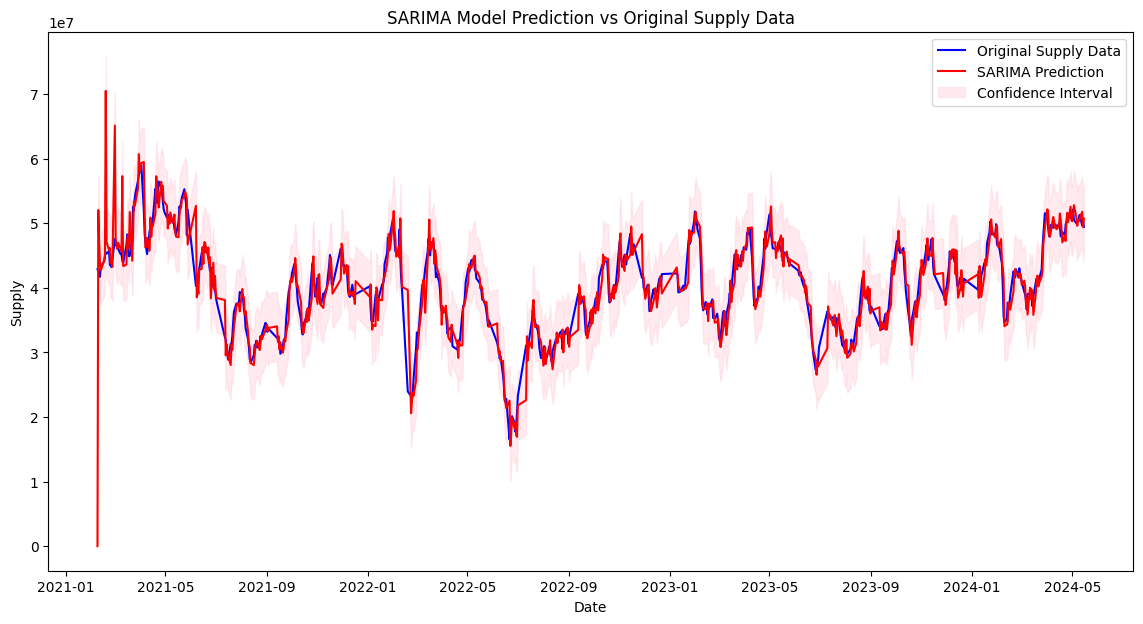

In [8]:
# Plot the original data and SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(supply_data.index, supply_data['Supply'], label='Original Supply Data', color='blue')
plt.plot(supply_data.index, forecast.predicted_mean, label='SARIMA Prediction', color='red')
plt.fill_between(
    supply_data.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)
plt.xlabel('Date')
plt.ylabel('Supply')
plt.title('SARIMA Model Prediction vs Original Supply Data')
plt.legend()
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate RMSE and R-squared for SARIMA predictions
rmse = np.sqrt(mean_squared_error(supply_data['Supply'], forecast.predicted_mean))
r2 = r2_score(supply_data['Supply'], forecast.predicted_mean)

rmse, r2


(np.float64(2905272.3220021096), 0.8275109237105089)

C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


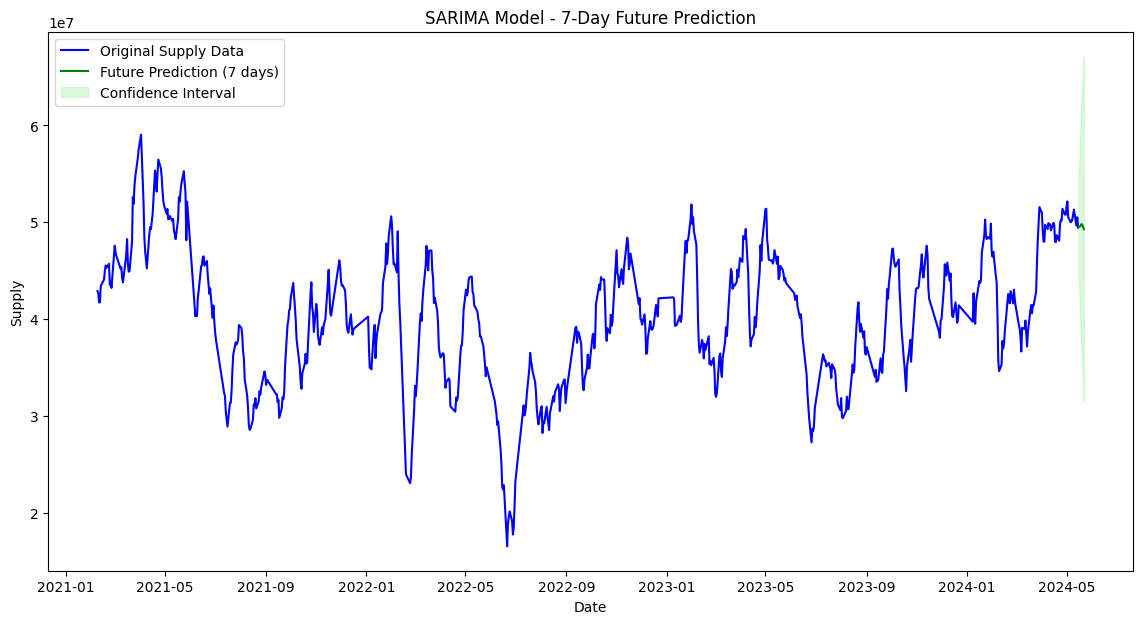

In [11]:
future_steps = 7
future_forecast = sarima_result.get_forecast(steps=future_steps)
future_index = pd.date_range(start=supply_data.index[-1] + pd.Timedelta(days=1), periods=future_steps)

# Extract the forecasted mean and confidence intervals
future_forecast_mean = future_forecast.predicted_mean
future_forecast_ci = future_forecast.conf_int()

# Plot the future forecast
plt.figure(figsize=(14, 7))
plt.plot(supply_data.index, supply_data['Supply'], label='Original Supply Data', color='blue')
plt.plot(future_index, future_forecast_mean, label='Future Prediction (7 days)', color='green')
plt.fill_between(
    future_index,
    future_forecast_ci.iloc[:, 0],
    future_forecast_ci.iloc[:, 1],
    color='lightgreen',
    alpha=0.3,
    label='Confidence Interval'
)
plt.xlabel('Date')
plt.ylabel('Supply')
plt.title('SARIMA Model - 7-Day Future Prediction')
plt.legend()
plt.show()

# Display the forecasted values
future_forecast_df = pd.DataFrame({
    'Date': future_index,
    'Predicted Supply': future_forecast_mean,
    'Lower CI': future_forecast_ci.iloc[:, 0],
    'Upper CI': future_forecast_ci.iloc[:, 1]
})